In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [2]:
df1 = pd.read_csv('Shopping_CustomerData.csv')
df1.head()

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


In [4]:
df_new = df1[["CustomerAge","SpendingScore"]]
df_new.head()

,CustomerAge,SpendingScore
0,49,78
1,59,63
2,54,69
3,42,30
4,30,6


In [5]:
df_new.describe()

,CustomerAge,SpendingScore
count,200.000000,200.00000
mean,45.520000,50.70500
std,16.113592,28.72269
min,18.000000,2.00000
25%,31.750000,27.75000
50%,46.500000,48.00000
75%,59.000000,77.00000
max,75.000000,100.00000


In [6]:
df_new.isnull().sum()

CustomerAge      0
SpendingScore    0
dtype: int64

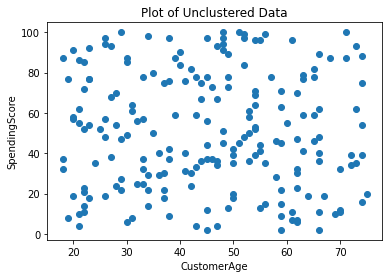

In [9]:
plt.scatter(df_new.CustomerAge, df_new.SpendingScore)
plt.title("Plot of Unclustered Data")
plt.xlabel("CustomerAge")
plt.ylabel("SpendingScore")
plt.show()

In [10]:
k_means = KMeans(n_clusters=3)
k_means.fit(df_new)

KMeans(n_clusters=3)

In [11]:
labels = k_means.predict(df_new)
labels

array([1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1,
       0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2,
       2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0,
       1, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2,
       0, 0])

In [14]:
centroids = k_means.cluster_centers_
centroids

array([[44.37288136, 16.72881356],
       [44.82089552, 84.65671642],
       [47.06756757, 47.05405405]])

In [15]:
k_means.inertia_

69228.8587969452

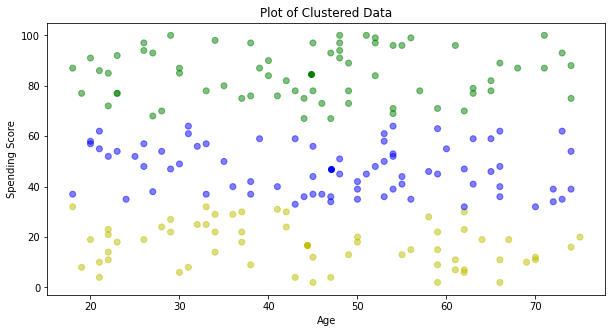

In [19]:
plt.figure(figsize = (10,5))
colmap = {1:"y", 2:"g", 3: "b", 4: "r", 5: "c"}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1 = list(colors)

plt.scatter(df_new["CustomerAge"], df_new["SpendingScore"],color = colors1, alpha = 0.5)
for idx,centroid in enumerate(centroids):
    plt.scatter(*centroid,color = colmap[idx+1])

plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Plot of Clustered Data")
plt.show()

['g', 'b', 'g', 'y', 'y', 'g', 'y', 'g', 'y', 'g', 'y', 'b', 'b', 'y', 'b', 'b', 'y', 'b', 'g', 'g', 'g', 'b', 'g', 'b', 'g', 'g', 'b', 'b', 'y', 'b', 'y', 'g', 'g', 'y', 'b', 'y', 'g', 'g', 'g', 'g', 'y', 'g', 'b', 'y', 'g', 'b', 'g', 'b', 'g', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'b', 'g', 'y', 'y', 'b', 'y', 'b', 'b', 'b', 'y', 'g', 'b', 'b', 'g', 'b', 'y', 'g', 'y', 'b', 'g', 'g', 'y', 'y', 'b', 'b', 'b', 'g', 'b', 'y', 'b', 'g', 'b', 'y', 'b', 'b', 'b', 'y', 'b', 'b', 'b', 'y', 'g', 'g', 'y', 'y', 'y', 'y', 'b', 'b', 'b', 'b', 'g', 'b', 'g', 'y', 'g', 'b', 'y', 'g', 'y', 'y', 'y', 'g', 'y', 'g', 'g', 'y', 'g', 'y', 'b', 'b', 'g', 'g', 'g', 'b', 'y', 'g', 'g', 'b', 'g', 'g', 'b', 'y', 'y', 'y', 'y', 'y', 'y', 'g', 'y', 'b', 'y', 'y', 'g', 'g', 'b', 'g', 'b', 'b', 'b', 'y', 'g', 'b', 'g', 'b', 'g', 'y', 'g', 'y', 'b', 'g', 'g', 'b', 'g', 'b', 'b', 'b', 'g', 'g', 'y', 'g', 'y', 'y', 'b', 'b', 'g', 'g', 'b', 'y', 'b', 'g', 'y', 'b', 'y', 'g', 'b', 'y', 'b', 'g', 'b', 'b', 'b', 'y', 'y']

In [26]:
inertia_list = []
for num_clusters in np.arange(1, 21):
    kmeans =KMeans(n_clusters=num_clusters)
    kmeans.fit(df_new)
    inertia_list.append(kmeans.inertia_)

In [27]:
inertia_list

[215843.51499999987,
 93076.96095008051,
 69228.8587969452,
 52511.65439725441,
 38741.973716759436,
 30149.6926165766,
 25034.33110465867,
 21571.204399063114,
 19268.02322450578,
 16872.916942084972,
 14898.65542412925,
 13270.204420595748,
 12456.201088617274,
 11514.069047945524,
 10966.286140493492,
 9994.91222249972,
 9143.070039682541,
 8981.1128968254,
 8189.861294261294,
 7806.948931623931]

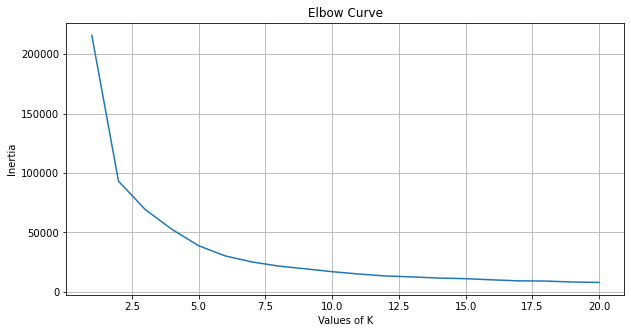

In [28]:
#Plotting the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()